In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum().sum()

0

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

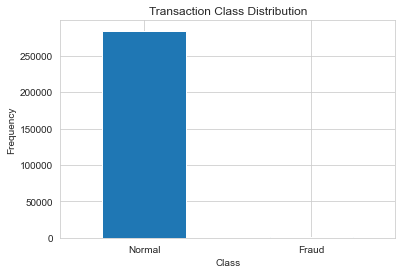

In [6]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [7]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [9]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [10]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


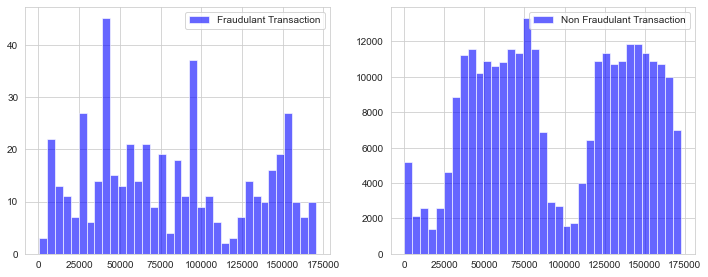

In [11]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

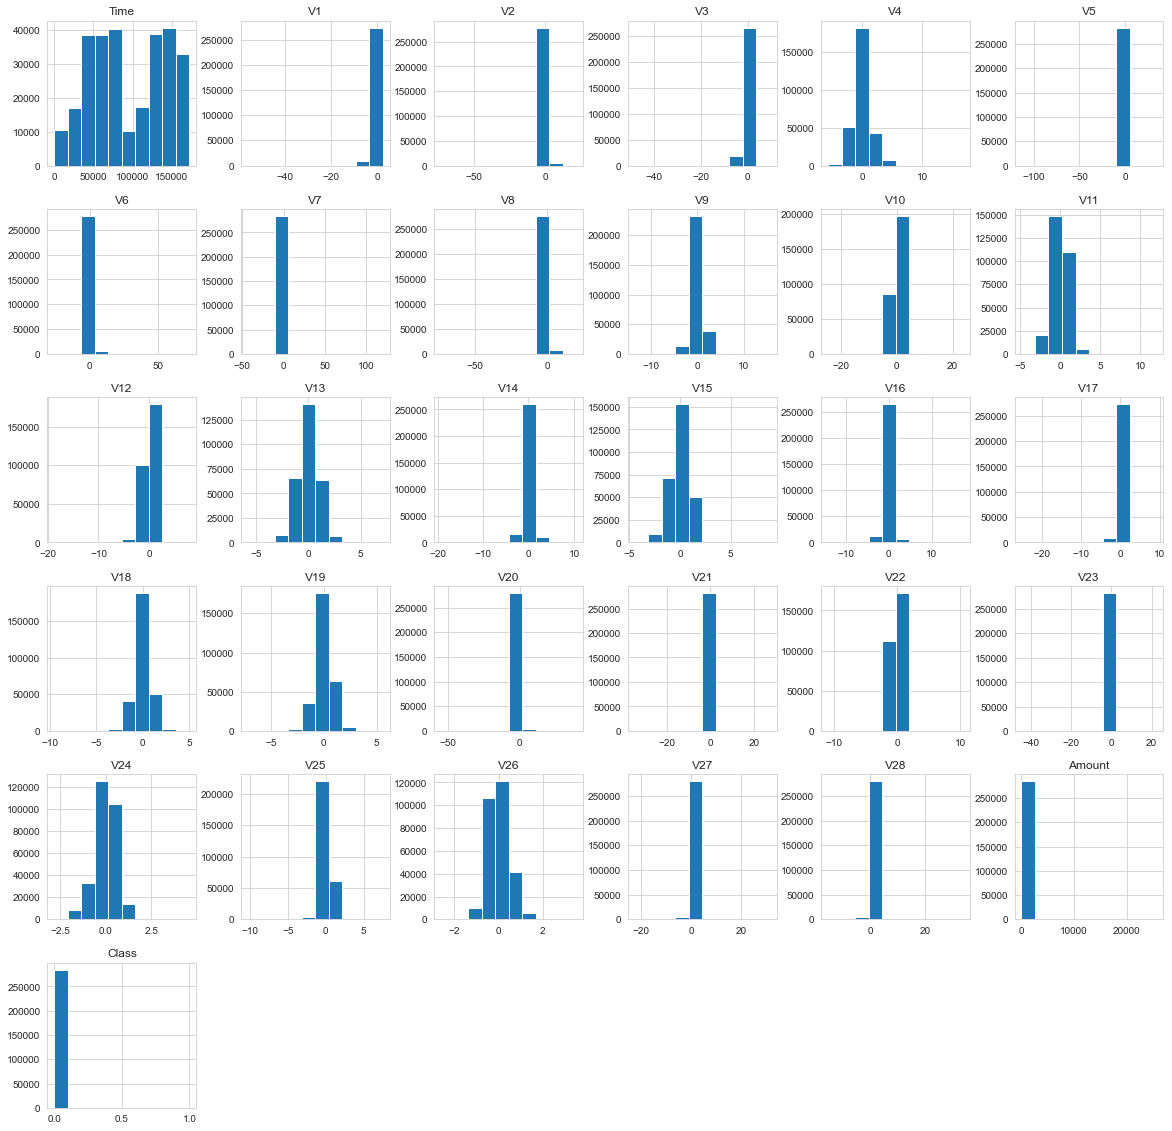

In [12]:
data.hist(figsize=(20, 20));

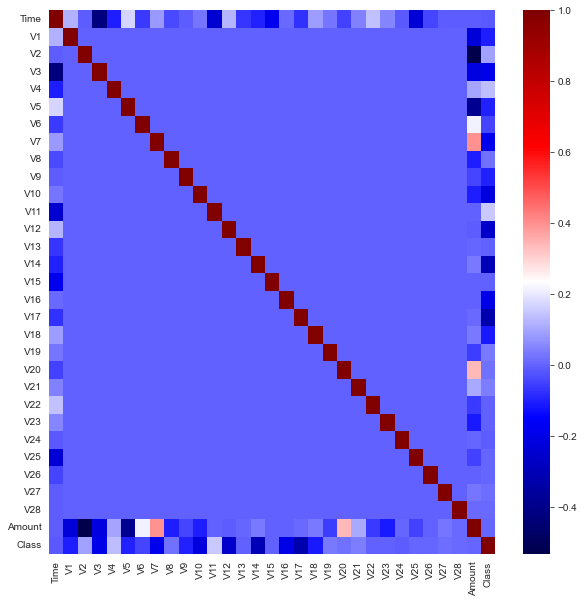

In [24]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [15]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [17]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
batch_normalization (BatchN  (None, 256)               1024      
ormalization)                                                    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batc  (None, 256)               1024      
hNormalization)                                                  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [19]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 8s 25ms/step - loss: 0.4890 - fn: 46.0000 - fp: 29529.0000 - tn: 129675.0000 - tp: 241.0000 - precision: 0.0081 - recall: 0.8397 - val_loss: 0.1938 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 2/300
78/78 [==============================] - 1s 7ms/step - loss: 0.1027 - fn: 84.0000 - fp: 550.0000 - tn: 158654.0000 - tp: 203.0000 - precision: 0.2696 - recall: 0.7073 - val_loss: 0.0441 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 3/300
78/78 [==============================] - 1s 7ms/step - loss: 0.0365 - fn: 93.0000 - fp: 145.0000 - tn: 159059.0000 - tp: 194.0000 - precision: 0.5723 - recall: 0.6760 - val_loss: 0.0222 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 4/300
78/78 [========================

Epoch 27/300
78/78 [==============================] - 1s 7ms/step - loss: 0.0028 - fn: 70.0000 - fp: 20.0000 - tn: 159184.0000 - tp: 217.0000 - precision: 0.9156 - recall: 0.7561 - val_loss: 0.0047 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 28/300
78/78 [==============================] - 1s 7ms/step - loss: 0.0029 - fn: 75.0000 - fp: 24.0000 - tn: 159180.0000 - tp: 212.0000 - precision: 0.8983 - recall: 0.7387 - val_loss: 0.0050 - val_fn: 16.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 53.0000 - val_precision: 0.8983 - val_recall: 0.7681
Epoch 29/300
78/78 [==============================] - 1s 7ms/step - loss: 0.0026 - fn: 70.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 217.0000 - precision: 0.9234 - recall: 0.7561 - val_loss: 0.0052 - val_fn: 20.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 49.0000 - val_precision: 0.8909 - val_recall: 0.7101
Epoch 30/300
78/78 [=============================

Epoch 53/300
78/78 [==============================] - 1s 7ms/step - loss: 0.0015 - fn: 47.0000 - fp: 18.0000 - tn: 159186.0000 - tp: 240.0000 - precision: 0.9302 - recall: 0.8362 - val_loss: 0.0057 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
Epoch 54/300
78/78 [==============================] - 1s 6ms/step - loss: 0.0018 - fn: 55.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 232.0000 - precision: 0.9243 - recall: 0.8084 - val_loss: 0.0053 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 55/300
78/78 [==============================] - 1s 7ms/step - loss: 0.0016 - fn: 50.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 237.0000 - precision: 0.9186 - recall: 0.8258 - val_loss: 0.0058 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 56/300
78/78 [=============================

Epoch 79/300
78/78 [==============================] - 1s 7ms/step - loss: 9.9058e-04 - fn: 37.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 250.0000 - precision: 0.9579 - recall: 0.8711 - val_loss: 0.0058 - val_fn: 15.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 54.0000 - val_precision: 0.8710 - val_recall: 0.7826
Epoch 80/300
78/78 [==============================] - 1s 7ms/step - loss: 0.0010 - fn: 35.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 252.0000 - precision: 0.9474 - recall: 0.8780 - val_loss: 0.0060 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 81/300
78/78 [==============================] - 1s 7ms/step - loss: 8.2044e-04 - fn: 25.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 262.0000 - precision: 0.9527 - recall: 0.9129 - val_loss: 0.0063 - val_fn: 14.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 55.0000 - val_precision: 0.8462 - val_recall: 0.7971
Epoch 82/300
78/78 [====================

78/78 [==============================] - 1s 7ms/step - loss: 0.0013 - fn: 33.0000 - fp: 19.0000 - tn: 159185.0000 - tp: 254.0000 - precision: 0.9304 - recall: 0.8850 - val_loss: 0.0083 - val_fn: 18.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 51.0000 - val_precision: 0.8361 - val_recall: 0.7391
Epoch 105/300
78/78 [==============================] - 1s 7ms/step - loss: 7.1082e-04 - fn: 26.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 261.0000 - precision: 0.9596 - recall: 0.9094 - val_loss: 0.0073 - val_fn: 15.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 54.0000 - val_precision: 0.9153 - val_recall: 0.7826
Epoch 106/300
78/78 [==============================] - 1s 7ms/step - loss: 7.5189e-04 - fn: 27.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 260.0000 - precision: 0.9594 - recall: 0.9059 - val_loss: 0.0074 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 107/300
78/78 [==============================

78/78 [==============================] - 1s 7ms/step - loss: 4.1880e-04 - fn: 13.0000 - fp: 4.0000 - tn: 159200.0000 - tp: 274.0000 - precision: 0.9856 - recall: 0.9547 - val_loss: 0.0079 - val_fn: 14.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 55.0000 - val_precision: 0.8333 - val_recall: 0.7971
Epoch 130/300
78/78 [==============================] - 1s 7ms/step - loss: 5.3661e-04 - fn: 15.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 272.0000 - precision: 0.9714 - recall: 0.9477 - val_loss: 0.0073 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 131/300
78/78 [==============================] - 1s 7ms/step - loss: 6.8796e-04 - fn: 19.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 268.0000 - precision: 0.9537 - recall: 0.9338 - val_loss: 0.0080 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 132/300
78/78 [============================

78/78 [==============================] - 1s 7ms/step - loss: 4.5151e-04 - fn: 15.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 272.0000 - precision: 0.9714 - recall: 0.9477 - val_loss: 0.0074 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 155/300
78/78 [==============================] - 1s 7ms/step - loss: 6.1692e-04 - fn: 21.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 266.0000 - precision: 0.9603 - recall: 0.9268 - val_loss: 0.0084 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 156/300
78/78 [==============================] - 1s 7ms/step - loss: 4.8461e-04 - fn: 16.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 271.0000 - precision: 0.9748 - recall: 0.9443 - val_loss: 0.0079 - val_fn: 14.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 55.0000 - val_precision: 0.8462 - val_recall: 0.7971
Epoch 157/300
78/78 [============================

78/78 [==============================] - 1s 7ms/step - loss: 3.2012e-04 - fn: 7.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 280.0000 - precision: 0.9722 - recall: 0.9756 - val_loss: 0.0077 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 55.0000 - val_precision: 0.9167 - val_recall: 0.7971
Epoch 180/300
78/78 [==============================] - 1s 7ms/step - loss: 5.1459e-04 - fn: 16.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 271.0000 - precision: 0.9610 - recall: 0.9443 - val_loss: 0.0079 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 181/300
78/78 [==============================] - 1s 7ms/step - loss: 5.2244e-04 - fn: 14.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 273.0000 - precision: 0.9579 - recall: 0.9512 - val_loss: 0.0073 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 182/300
78/78 [============================

78/78 [==============================] - 1s 7ms/step - loss: 5.6375e-04 - fn: 17.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 270.0000 - precision: 0.9574 - recall: 0.9408 - val_loss: 0.0082 - val_fn: 12.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 57.0000 - val_precision: 0.8143 - val_recall: 0.8261
Epoch 205/300
78/78 [==============================] - 1s 7ms/step - loss: 6.8658e-04 - fn: 14.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 273.0000 - precision: 0.9579 - recall: 0.9512 - val_loss: 0.0084 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
Epoch 206/300
78/78 [==============================] - 1s 7ms/step - loss: 5.4316e-04 - fn: 12.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 275.0000 - precision: 0.9615 - recall: 0.9582 - val_loss: 0.0078 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 207/300
78/78 [========================

Epoch 230/300
78/78 [==============================] - 1s 16ms/step - loss: 2.2777e-04 - fn: 7.0000 - fp: 3.0000 - tn: 159201.0000 - tp: 280.0000 - precision: 0.9894 - recall: 0.9756 - val_loss: 0.0072 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 231/300
78/78 [==============================] - 1s 16ms/step - loss: 3.6770e-04 - fn: 8.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 279.0000 - precision: 0.9721 - recall: 0.9721 - val_loss: 0.0071 - val_fn: 14.0000 - val_fp: 3.0000 - val_tn: 39801.0000 - val_tp: 55.0000 - val_precision: 0.9483 - val_recall: 0.7971
Epoch 232/300
78/78 [==============================] - 1s 16ms/step - loss: 3.2907e-04 - fn: 12.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 275.0000 - precision: 0.9821 - recall: 0.9582 - val_loss: 0.0075 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 233/300
78/78 [===============

78/78 [==============================] - 1s 15ms/step - loss: 3.0774e-04 - fn: 11.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 276.0000 - precision: 0.9753 - recall: 0.9617 - val_loss: 0.0082 - val_fn: 13.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 56.0000 - val_precision: 0.8358 - val_recall: 0.8116
Epoch 256/300
78/78 [==============================] - 1s 16ms/step - loss: 3.3666e-04 - fn: 10.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 277.0000 - precision: 0.9823 - recall: 0.9652 - val_loss: 0.0077 - val_fn: 14.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 55.0000 - val_precision: 0.8333 - val_recall: 0.7971
Epoch 257/300
78/78 [==============================] - 1s 16ms/step - loss: 1.7393e-04 - fn: 3.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 284.0000 - precision: 0.9793 - recall: 0.9895 - val_loss: 0.0076 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 258/300
78/78 [==========================

78/78 [==============================] - 1s 16ms/step - loss: 3.1877e-04 - fn: 11.0000 - fp: 4.0000 - tn: 159200.0000 - tp: 276.0000 - precision: 0.9857 - recall: 0.9617 - val_loss: 0.0087 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 281/300
78/78 [==============================] - 1s 16ms/step - loss: 2.1887e-04 - fn: 7.0000 - fp: 4.0000 - tn: 159200.0000 - tp: 280.0000 - precision: 0.9859 - recall: 0.9756 - val_loss: 0.0087 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 282/300
78/78 [==============================] - 1s 16ms/step - loss: 1.5685e-04 - fn: 5.0000 - fp: 2.0000 - tn: 159202.0000 - tp: 282.0000 - precision: 0.9930 - recall: 0.9826 - val_loss: 0.0084 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 283/300
78/78 [=============================

In [20]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 8s 3ms/step - loss: 0.0052 - fn: 32.0000 - fp: 16.0000 - tn: 85291.0000 - tp: 104.0000 - precision: 0.8667 - recall: 0.7647
[0.0052120680920779705, 32.0, 16.0, 85291.0, 104.0, 0.8666666746139526, 0.7647058963775635]


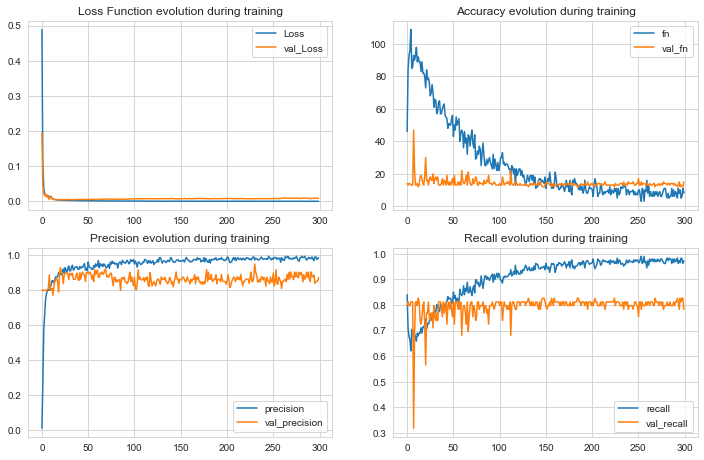

In [21]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999987    0.996503  0.999981       0.998245       0.999981
recall          0.999994    0.993031  0.999981       0.996513       0.999981
f1-score        0.999991    0.994764  0.999981       0.997377       0.999981
support    159204.000000  287.000000  0.999981  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159203      1]
 [     2    285]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999625    0.866667  0.999438      0.933146      0.999413
recall         0.999812    0.764706  0.999438      0.882259      0.999438
f1-score       0.999719    0.812500  0.999438      0.906109      0.999421